<a href="https://colab.research.google.com/github/cgarciav/base-de-datos-HCC/blob/master/svm_caracter%C3%ADsticas_seleccionadas_diversos_metodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
#%load_ext tensorboard    Carga de Tensorboard (opcional)
# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf #libreria de google que permite hacer deeplearning
from tensorflow import keras #libreria de alto nivel
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import random
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
path='/content/drive/My Drive/analisis de datos/hcc-data-complete-balanced.csv'
df=pd.read_csv(path)

In [4]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,67,137,15.0,0,1,1,1.53,95.0,13.7,106.6,4.9,99.00,3.40,2.10,34,41,183,150,7.1,0.70,1,3.5,0.50,52.5,37.0,856.0,1
1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,62,0,0.0,0,1,1,1.24,2.6,10.3,83.0,6.1,1.71,3.90,0.80,11,28,77,120,7.0,0.58,1,1.8,0.85,32.0,10.0,18.0,1
2,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,78,50,50.0,2,1,2,0.96,5.8,8.9,79.8,8.4,472.00,3.30,0.40,58,68,202,109,7.0,2.10,5,13.0,0.10,28.0,6.0,16.0,1
3,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,77,40,30.0,0,1,1,0.95,2440.0,13.4,97.1,9.0,279.00,3.70,0.40,16,64,94,174,8.1,1.11,2,15.7,0.20,131.0,78.0,1316.0,0
4,1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,76,100,30.0,0,1,1,0.94,49.0,14.3,95.1,6.4,199.00,4.10,0.70,147,306,173,109,6.9,1.80,1,9.0,0.10,59.0,15.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,70,17,7.0,0,1,1,1.33,502.6,11.1,102.8,6.9,90846.80,3.18,2.67,102,126,389,117,7.0,5.25,2,8.8,1.35,73.3,46.0,873.0,0
200,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,80,107,13.0,3,2,2,1.35,2353.7,12.2,95.2,6.7,332033.67,3.26,1.07,24,56,229,231,6.5,0.78,2,7.6,1.04,69.3,23.0,70.0,0
201,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,80,86,0.0,3,1,1,1.55,23.4,10.2,96.3,7.4,195.76,2.93,3.22,66,68,469,304,7.0,1.07,1,12.0,1.57,71.2,29.0,106.0,0
202,1,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,1,1,74,124,0.0,3,2,1,1.33,6.1,13.0,86.0,1118.4,101884.41,3.31,1.45,29,48,203,197,7.2,1.08,5,3.0,0.63,94.4,83.0,859.0,0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [0]:
x = df.drop(['Class'], axis=1) 
y=df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.2, random_state=42)


In [0]:
#normalizamos datos
from sklearn import preprocessing

scaler=preprocessing.StandardScaler().fit(x_train)

x_train_transformed=scaler.transform(x_train)
x_test_transformed=scaler.transform(x_test)


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import roc_auc_score


TRABAJO CON CARACTERÍSTICAS SELECCIONADAS

In [0]:
x2=df[['Total_Bil','TP','Sat','PS','Major_Dim','Leucocytes','INR','Hemoglobin','Ferritin','Albumin','Age','AST','ALP' ]] 
y2=df['Class']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2,stratify=y2, test_size=0.2, random_state=42)



In [0]:
#normalizamos datos
from sklearn import preprocessing

scaler=preprocessing.StandardScaler().fit(x_train2)

x_train_transf=scaler.transform(x_train2)
x_test_transf=scaler.transform(x_test2)
y_train_transf=y_train2
y_test_transf=y_test2

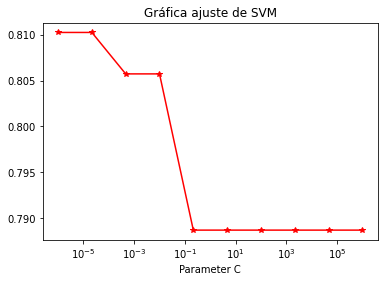

1e-06

In [11]:

c_values2=np.logspace(-6,6, 10)
cv_c_scores2=[]


for k in c_values2:

    clf2 = svm.LinearSVC(C=k,dual=False, max_iter= 10000)
    scores = cross_val_score(clf2, x_train_transf, y_train_transf, cv=10 ,scoring='roc_auc') #aplicamos cross validation
    cv_c_scores2.append(scores.mean())


  
# Do the plotting
import matplotlib.pyplot as plt
plt.figure()

plt.semilogx(c_values2,cv_c_scores2,color='r' , marker='*' , label='cv')
locs, labels = plt.yticks()
#plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
#plt.ylabel('accuracy')
plt.xlabel('Parameter C')
plt.title('Gráfica ajuste de SVM')
plt.show()


#select the maximum because we are considering accuracy
c_opt2=(np.array(c_values2)[cv_c_scores2.index(np.array(cv_c_scores2).max())])
c_opt2
#obtengo valor maximo que tengo que usar para mi clasificador(k)   

In [0]:
clf2 = svm.LinearSVC(C=c_opt2).fit(x_train_transf,y_train_transf)


In [13]:
from sklearn.metrics import classification_report

y_pred=clf2.predict(x_test_transf)
prestations=classification_report(y_test_transf,y_pred)
print(prestations)

print('score:', clf2.score(x_test_transf, y_test_transf))
print ('AUC:', roc_auc_score(y_test_transf,y_pred))

print('\n \n Matriz de confusion: ')
matriz= pd.crosstab(y_test_transf,y_pred,rownames=['Real'], colnames=['Predicted'], margins= True)
matriz

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.83      0.75      0.79        20

    accuracy                           0.80        41
   macro avg       0.81      0.80      0.80        41
weighted avg       0.81      0.80      0.80        41

score: 0.8048780487804879
AUC: 0.8035714285714286

 
 Matriz de confusion: 


Predicted,0,1,All
Real,,,
0,18,3,21
1,5,15,20
All,23,18,41
